In [49]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import roc_curve , auc , accuracy_score, precision_score, recall_score, f1_score ,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV #하이퍼 파리미터 튜닝 

import matplotlib.pyplot as plt
import mglearn
import numpy as np 
import pandas as pd 
%matplotlib inline 

In [27]:
df = pd.read_csv('UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [28]:
X = df.drop(['ID','ZIPCode','PersonalLoan'],axis=1)
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [29]:
y = df['PersonalLoan']
np.bincount(y)

array([4520,  480], dtype=int64)

In [30]:
X['Education']=X['Education'].replace([1,2,3],['Under','Grad','Prof'])
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,Under,0,1,0,0,0
1,45,19,34,3,1.5,Under,0,1,0,0,0
2,39,15,11,1,1.0,Under,0,0,0,0,0
3,35,9,100,1,2.7,Grad,0,0,0,0,0
4,35,8,45,4,1.0,Grad,0,0,0,0,1


In [31]:
X = pd.get_dummies(X[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']],
                  columns=['Education'],
                  drop_first=True)

X.head()


,Age,Experience,Income,Family,CCAvg,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,Education_Prof,Education_Under
0,25,1,49,4,1.6,0,1,0,0,0,0,1
1,45,19,34,3,1.5,0,1,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,0,0
4,35,8,45,4,1.0,0,0,0,0,1,0,0


In [32]:
#Train set , Test set 
X_train , X_test , y_train ,y_test = train_test_split(X,y ,test_size=0.3 ,random_state =999,stratify =y)

In [40]:
logistic = LogisticRegression(random_state=999)
tree = DecisionTreeClassifier(random_state=999)
knn = KNeighborsClassifier()


voting_estimators = [('logistic',logisitic),('tree',tree),('knn',knn)]

voting = VotingClassifier(estimators=voting_estimators, voting ='soft')

model_label = ['LogisiticRegression','DecisionTreeClassifier','KNN','Majority voting']
modelList = [logistic, tree,knn ,voting]

In [42]:
for m , label in zip(modelList,model_label):
    scores = cross_val_score(estimator = m ,X=X_train , y= y_train,
                            cv =10 , scoring ='roc_auc')
    print('ROC AUC : %0.3f (+/- %0.3f) [%s]'%(scores.mean(),scores.std(),label))

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

ROC AUC : 0.959 (+/- 0.013) [LogisiticRegression]
ROC AUC : 0.943 (+/- 0.020) [DecisionTreeClassifier]
ROC AUC : 0.872 (+/- 0.031) [KNN]


C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

ROC AUC : 0.978 (+/- 0.011) [Majority voting]


C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\matplotlib\legend.py:493: UserWarning: Unrecognized location "lower irght". Falling back on "best"; valid locations are
	right
	center
	lower right
	lower left
	best
	lower center
	center left
	center right
	upper left
	upper right
	upper center

  % (loc, '\n\t'.join(self.codes)))


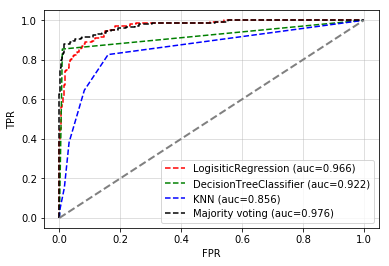

In [46]:
colors = ['red','green','blue','black']
for m , label , c , in zip(modelList,model_label,colors):
    m.fit(X_train,y_train)
    y_pred = m.predict_proba(X_test)[:,1]
    fpr, tpr , thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,color=c , linestyle='--',label ='%s (auc=%0.3f)'%(label, roc_auc))
plt.legend(loc='lower irght')
plt.plot([0,1],[0,1],linestyle='--',color ='gray',linewidth = 2)
plt.grid(alpha=0.5)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [47]:
voting.get_params()

{'estimators': [('logistic',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
             intercept_scaling=1, max_iter=100, multi_class='warn',
             n_jobs=None, penalty='l2', random_state=999, solver='warn',
             tol=0.0001, verbose=0, warm_start=False)),
  ('tree',
   DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, presort=False, random_state=999,
               splitter='best')),
  ('knn',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
              metric_params=None, n_jobs=None, n_neighbors=5, p=2,
              weights='uniform'))],
 'flatten_transform': None,
 'knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metr

In [56]:
params = {'logistic__C': [0.001,0.1,100.0],
          'tree__max_depth': [1,2,3,4,5],
          'knn__n_neighbors': [1,2,3,4,5]
         }

grid = GridSearchCV(estimator = voting,
                   param_grid=params , cv = 10 , scoring = 'roc_auc')

grid.fit(X_train,y_train)

for r, _ in enumerate (grid.cv_results_['mean_test_score']):
    print('%0.3f +/- %0.3f %r'
         %(grid.cv_results_['mean_test_score'][r],
            grid.cv_results_['std_test_score'][r]/2.0,
                grid.cv_results_['params'][r]))

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

0.927 +/- 0.005 {'logistic__C': 0.001, 'knn__n_neighbors': 1, 'tree__max_depth': 1}
0.961 +/- 0.002 {'logistic__C': 0.001, 'knn__n_neighbors': 1, 'tree__max_depth': 2}
0.975 +/- 0.003 {'logistic__C': 0.001, 'knn__n_neighbors': 1, 'tree__max_depth': 3}
0.976 +/- 0.003 {'logistic__C': 0.001, 'knn__n_neighbors': 1, 'tree__max_depth': 4}
0.975 +/- 0.003 {'logistic__C': 0.001, 'knn__n_neighbors': 1, 'tree__max_depth': 5}
0.939 +/- 0.006 {'logistic__C': 0.1, 'knn__n_neighbors': 1, 'tree__max_depth': 1}
0.975 +/- 0.003 {'logistic__C': 0.1, 'knn__n_neighbors': 1, 'tree__max_depth': 2}
0.985 +/- 0.003 {'logistic__C': 0.1, 'knn__n_neighbors': 1, 'tree__max_depth': 3}
0.984 +/- 0.002 {'logistic__C': 0.1, 'knn__n_neighbors': 1, 'tree__max_depth': 4}
0.983 +/- 0.003 {'logistic__C': 0.1, 'knn__n_neighbors': 1, 'tree__max_depth': 5}
0.943 +/- 0.005 {'logistic__C': 100.0, 'knn__n_neighbors': 1, 'tree__max_depth': 1}
0.977 +/- 0.003 {'logistic__C': 100.0, 'knn__n_neighbors': 1, 'tree__max_depth': 2}
0.

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [58]:
print('최적의 파라미터 : %s'% grid.best_params_)
print('ACU : %0.3f: '%grid.best_score_)

최적의 파라미터 : {'logistic__C': 100.0, 'knn__n_neighbors': 4, 'tree__max_depth': 4}
ACU : 0.987: 
